#Miembros equipo

###ignacio.martinez12@alu.uclm.es
###pablo.valle1@alu.uclm.es
###pedro.rodriguez9@alu.uclm.es

#Imports and read csv

First things first, if we do not have data to process we are doing nothing so, we are going to upload the corresponding data, in this case, we will use the collected data about world cup 2018 in the worldcup_2018_final_data.csv file.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

In [ ]:
import pandas as pd

df = pd.read_csv("worldcup_2018_final_data.csv", sep =",", index_col="team_name")
df.head()

,Unnamed: 0,team_round,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,...,fouls_recieved_average,yellow_cards_average,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average
team_name,,,,,,,,,,,,,,,,,,,,,
Argentina,1,Round of 16,1.50,0.00,1.50,0.00,0.00,0.00,0.0,1.25,...,19.00,2.75,0.00,18.5,15.0,1.50,3.75,1.24,1.04,0.09
Australia,2,Group stage,0.00,0.67,0.67,0.00,0.00,0.67,0.0,0.67,...,10.00,2.33,0.00,17.0,12.0,3.00,4.67,1.17,-1.50,0.10
Belgium,3,Third,2.14,0.14,2.29,0.00,0.00,0.14,0.0,1.72,...,10.57,1.57,0.00,14.0,11.0,3.57,4.57,1.70,4.13,0.11
Brazil,4,Quarter-finals,1.40,0.20,1.60,0.20,0.00,0.00,0.0,1.20,...,14.40,1.40,0.00,16.0,13.0,1.00,1.40,2.47,-4.35,0.12
Colombia,5,Round of 16,0.50,1.00,1.50,0.75,0.25,0.00,0.0,0.75,...,13.00,2.25,0.25,14.0,8.0,2.50,3.25,0.68,3.28,0.07


#Feature selection

First of all, when making the feature selection, we will make a first manual compilation of the offensive features of the teams, such as goals, shots, corners, dribbles and crosses.

In [ ]:
e1 = df.loc[:,['goals' in i for i in df.columns]]
e2 = df.loc[:,['shots' in i for i in df.columns]]
e3 = df.loc[:,['dribbles' in i for i in df.columns]]
e4 = df.loc[:,['corne' in i for i in df.columns]]
e5 = df.loc[:,['cross' in i for i in df.columns]]
ee = e1.append(e2).append(e3).append(e4).append(e5)
ofensive_features = list(ee.columns)
ofensive_features.append('possession_average')
df_f = df.loc[:, df.columns.isin(ofensive_features)]
df_f

,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goals_scored_header_average,goals_scored_own_goal_average,shots_per_goal_average,...,possession_average,dribbles_average,dribbles_completed_average,dribbles_completed_percentage,corners_average,crosses_average,crosses_completed_average,crosses_completed_percentage,shots_on_target_conceded_average,goals-xG_total
team_name,,,,,,,,,,,,,,,,,,,,,
Argentina,1.50,0.00,1.50,0.00,0.00,0.00,0.00,0.25,0.00,9.5,...,0.64,20.25,13.25,0.654,6.00,12.50,1.75,0.140,3.75,1.04
Australia,0.00,0.67,0.67,0.00,0.00,0.67,0.00,0.00,0.00,17.5,...,0.51,18.00,11.00,0.611,4.67,12.33,2.00,0.162,4.67,-1.50
Belgium,2.14,0.14,2.29,0.00,0.00,0.14,0.00,0.43,0.14,6.7,...,0.53,17.29,13.14,0.760,5.71,10.43,2.86,0.274,4.57,4.13
Brazil,1.40,0.20,1.60,0.20,0.00,0.00,0.00,0.40,0.00,13.3,...,0.56,22.60,14.80,0.655,8.20,12.80,2.60,0.203,1.40,-4.35
Colombia,0.50,1.00,1.50,0.75,0.25,0.00,0.00,0.75,0.00,6.5,...,0.51,16.00,7.75,0.488,3.25,12.75,2.00,0.157,3.25,3.28
Costa Rica,0.33,0.33,0.67,0.33,0.00,0.00,0.00,0.33,0.33,14.0,...,0.41,16.33,9.00,0.551,3.67,10.67,3.00,0.281,5.00,-0.09
Croatia,1.71,0.29,2.00,0.00,0.14,0.14,0.00,0.29,0.14,8.5,...,0.56,18.00,11.86,0.659,5.51,19.14,2.86,0.149,4.14,3.57
Denmark,0.50,0.25,0.75,0.00,0.00,0.00,0.25,0.00,0.00,13.3,...,0.45,13.50,8.25,0.611,4.50,8.75,1.75,0.200,5.00,0.20
Egypt,0.33,0.33,0.67,0.00,0.00,0.33,0.00,0.00,0.00,14.5,...,0.44,11.33,5.67,0.500,2.00,12.00,2.00,0.167,5.00,-0.63


In order to analyze the features and not the elements what we do is to transpose the data, therefore the rows represent the offensive features and the columns represent the countries.

In [ ]:
df_featt = transpose(df_f)
names = df_featt.index.values
df_featt

team_name,Argentina,Australia,Belgium,Brazil,Colombia,Costa Rica,Croatia,Denmark,Egypt,England,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
goals_scored_open_play_average,1.500,0.000,2.140,1.400,0.500,0.330,1.710,0.500,0.330,0.430,...,0.500,1.200,0.330,1.330,0.330,1.000,0.800,1.000,1.000,0.600
goals_scored_set_play_average,0.000,0.670,0.140,0.200,1.000,0.330,0.290,0.250,0.330,1.290,...,1.000,1.000,0.330,0.000,0.330,0.750,0.400,0.250,0.670,0.800
goals_scored_average,1.500,0.670,2.290,1.600,1.500,0.670,2.000,0.750,0.670,1.710,...,1.500,2.200,0.670,1.330,0.670,1.750,1.200,1.250,1.670,1.400
goals_scored_corner_average,0.000,0.000,0.000,0.200,0.750,0.330,0.000,0.000,0.000,0.570,...,0.500,0.000,0.000,0.000,0.000,0.500,0.000,0.250,0.000,0.400
goals_scored_free_kick_average,0.000,0.000,0.000,0.000,0.250,0.000,0.140,0.000,0.000,0.430,...,0.250,0.800,0.000,0.000,0.330,0.250,0.000,0.000,0.330,0.400
goals_scored_penalty_average,0.000,0.670,0.140,0.000,0.000,0.000,0.140,0.000,0.330,0.570,...,0.250,0.200,0.330,0.000,0.000,0.000,0.400,0.000,0.330,0.000
goals_scored_.throw_in_average,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.250,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
goals_scored_header_average,0.250,0.000,0.430,0.400,0.750,0.330,0.290,0.000,0.000,0.710,...,0.500,0.600,0.000,0.000,0.330,0.000,0.000,0.250,0.330,0.400
goals_scored_own_goal_average,0.000,0.000,0.140,0.000,0.000,0.330,0.140,0.000,0.000,0.000,...,0.000,0.200,0.000,0.330,0.000,0.250,0.200,0.000,0.000,0.200
shots_per_goal_average,9.500,17.500,6.700,13.300,6.500,14.000,8.500,13.300,14.500,8.100,...,9.200,4.500,11.600,7.500,17.000,10.300,9.300,11.600,7.400,8.900


##Correlation analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



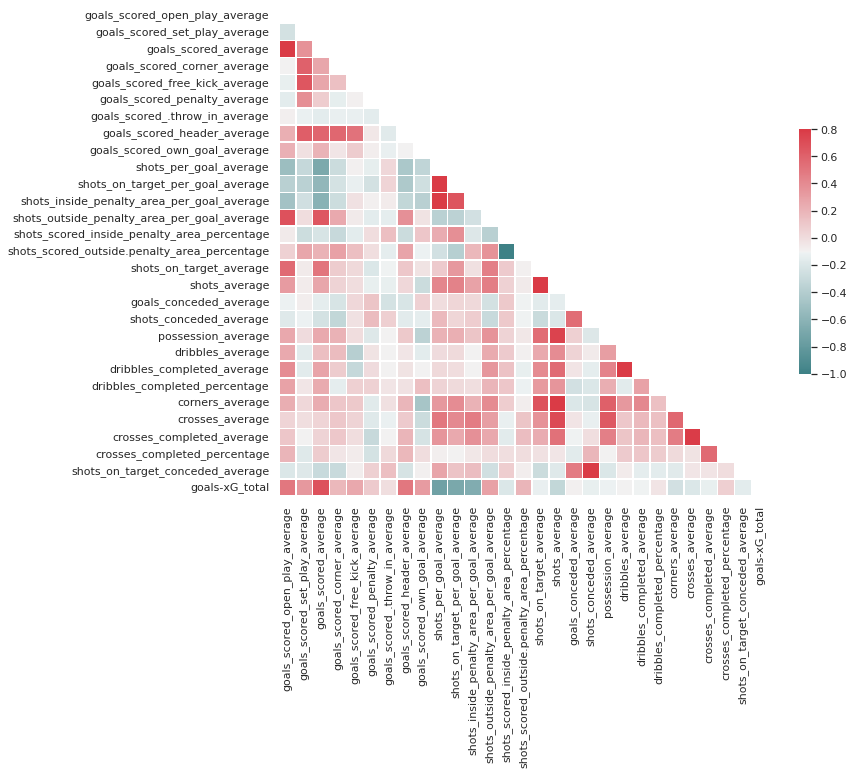

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_featt)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

The variables are correlated between them, but not too much (less than 1). So that we will continue having them in account but being conscious of their similarity.

##Principal Component Analysis

We will use PCA analysis to know how to the features are interrelated

In [ ]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.StandardScaler()
features_norm = min_max_scaler.fit_transform(df_featt)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 3)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [0.78253626 0.15043749 0.03455316]


The explained variance ratio per PC is acceptable. The X-axis representing almost 80% of the variability of the data set.

In [ ]:
#plotting orginal points with color related to label
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = names[i])
fig.show()

It can be observed that many of the variables are very similar among them, and only some of them like *shots_outside_penalty_area_per_goal_average* which are different from the others and could be selected for further clustering.

##Hierarchical Clustering Algorithm

Since we have few elements to study we can use hierarchical clustering to observe the relationships of similarity between variables. Those groups of variables that are similar between them can be summarized by choosing one of them and that way we would reduce the dimensionality of the data set.

To avoid the curse of dimensionality, clustering can be done with the results of the principal component analysis.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



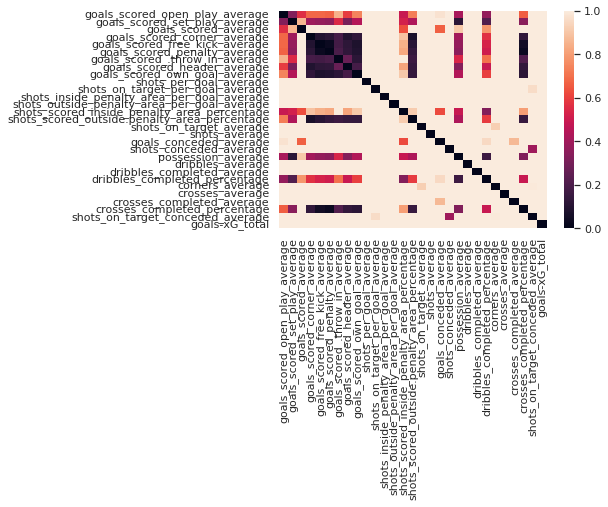

In [ ]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(X_pca)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



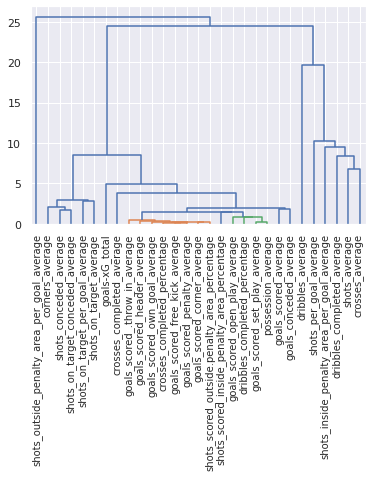

In [ ]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 1, labels = names , leaf_rotation=90)
plt.show()

In [ ]:
cut = 1# !!!! ad-hoc
label = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

label

array([ 7,  7,  9,  6,  6,  6,  6,  6,  6, 17,  4, 16, 19,  8,  6,  5, 13,
       10,  1,  7, 18, 15,  7,  3, 14, 11,  6,  2, 12], dtype=int32)

We have used Single Link in order to quickly isolate those elements that are outliers and that are going to be the most significant features, such as shots_outside_penalty_area_per_goal_average in this case. Then several groups are distinguished.

In [ ]:
grupos = list(label)
feature_names = list(names)
outliers = []
gg = []
cont = 0
while cont < len(grupos):
  element = grupos[cont]
  if element not in gg:
    gg.append(grupos[cont])
    outliers.append(feature_names[cont])
  cont += 1

len(outliers)
  

19

We select one outlier from each group. These will be the ones we will work with later. We get 19 features.

In [ ]:
df_feature_selection = df.loc[:, df.columns.isin(outliers)]
countries = list(df_feature_selection.index)
df_feature_selection

,goals_scored_open_play_average,goals_scored_average,goals_scored_corner_average,shots_per_goal_average,shots_on_target_per_goal_average,shots_inside_penalty_area_per_goal_average,shots_outside_penalty_area_per_goal_average,shots_scored_inside_penalty_area_percentage,shots_on_target_average,shots_average,goals_conceded_average,shots_conceded_average,dribbles_average,dribbles_completed_average,corners_average,crosses_average,crosses_completed_average,shots_on_target_conceded_average,goals-xG_total
team_name,,,,,,,,,,,,,,,,,,,
Argentina,1.50,1.50,0.00,9.5,3.0,7.0,22,0.83,4.5,14.3,2.25,3.50,20.25,13.25,6.00,12.50,1.75,3.75,1.04
Australia,0.00,0.67,0.00,17.5,4.0,11.5,0,1.00,2.7,11.7,1.67,4.67,18.00,11.00,4.67,12.33,2.00,4.67,-1.50
Belgium,2.14,2.29,0.00,6.7,2.5,4.5,39,0.94,5.7,15.3,0.86,4.71,17.29,13.14,5.71,10.43,2.86,4.57,4.13
Brazil,1.40,1.60,0.20,13.3,4.8,9.4,40,0.88,7.6,21.2,0.60,1.80,22.60,14.80,8.20,12.80,2.60,1.40,-4.35
Colombia,0.50,1.50,0.75,6.5,2.0,4.0,19,0.83,3.0,9.8,0.75,3.25,16.00,7.75,3.25,12.75,2.00,3.25,3.28
Costa Rica,0.33,0.67,0.33,14.0,4.5,7.5,0,1.00,3.0,9.3,1.67,5.33,16.33,9.00,3.67,10.67,3.00,5.00,-0.09
Croatia,1.71,2.00,0.00,8.5,2.0,5.0,54,0.93,4.0,17.0,1.29,4.00,18.00,11.86,5.51,19.14,2.86,4.14,3.57
Denmark,0.50,0.75,0.00,13.3,4.0,6.7,0,1.00,3.0,10.0,0.50,4.75,13.50,8.25,4.50,8.75,1.75,5.00,0.20
Egypt,0.33,0.67,0.00,14.5,2.5,15.0,14,0.50,1.7,9.7,2.00,5.67,11.33,5.67,2.00,12.00,2.00,5.00,-0.63


#Dimensionality reduction

##Principal Component Analysis

We will use the PCA analysis to know the characteristics that, in this case the previously selected ones, are interrelated.

In [ ]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norma = min_max_scaler.fit_transform(df_feature_selection)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 4)
X_pcaa = estimator.fit_transform(features_norma)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [0.29309671 0.22122279 0.12139756 0.09092226]


In [ ]:
#plotting orginal points with color related to label
import plotly.express as px
fig = px.scatter(x=X_pcaa[:,0], y= X_pcaa[:,1])

for i in range(0,len(X_pcaa)):
     fig.add_annotation(x = X_pcaa[i,0], y = X_pcaa[i,1], text = df_feature_selection.iloc[i,:].name)
fig.show()

It can be observed that many of the variables are very similar among them, and only some of them like Germany which are different from the others and could be selected for further clustering.

#Outlier identification

We will use **DBSCAN** to identify outliers because it is the first algorithm that was defined based on density describing the concepts of central point, edge and noise. The central points have a neighborhood area for a given radius that has at least a minimum number of points, i.e. their neighborhood area exceeds a certain threshold. 

We draw in a chart the shortest distance to the neighbor to obtain the epsilon to use in DBSCAN. As MintPts we put a low number, considering that having 2 similar states is already synonymous with a dense area.

* Compute a similiarity/distance matrix

In [ ]:
# 3.1. Compute the similarity matrix
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('manhattan')
matsim = dist.pairwise(X_pcaa)


# 3.1.1 Visualization
import plotly.express as px

fig = px.imshow(matsim)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy

minPts=2

A = kneighbors_graph(X_pcaa, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(X_pcaa):
    for j in range(len(X_pcaa)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()

In [ ]:
fig = px.line(x=numpy.arange(0, len(seq), 1), y=seq)
fig.show()

Although it could be tested with other options we are going to choose to try different clusters from 0.5 to 1.5 with intervals of 0.1. However, the layout of the data will make DBSCAN only isolate a dense area of those elements that it considers outliers.

In [ ]:
from sklearn.cluster import DBSCAN

results = []
for eps in numpy.arange(0.5, 0.8, 0.01):
  db = DBSCAN(eps, min_samples=minPts).fit(X_pcaa)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  #print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  results.append([eps, n_clusters_, n_outliers])

#print results
from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
 0.5            4          12
 0.51           4          12
 0.52           4          11
 0.53           4          11
 0.54           3          10
 0.55           3           9
 0.56           2           9
 0.57           2           9
 0.58           2           9
 0.59           2           9
 0.6            2           9
 0.61           2           9
 0.62           2           8
 0.63           1           8
 0.64           2           5
 0.65           2           5
 0.66           2           5
 0.67           2           5
 0.68           2           5
 0.69           2           5
 0.7            2           5
 0.71           3           3
 0.72           3           3
 0.73           3           2
 0.74           3           2
 0.75           3           1
 0.76           3           1
 0.77           2           1
 0.78           1           1
 0.79           1           1
 0.8            1           1


##Execution

As we can see DBSCAN groups the elements in a group and the rest are outliers. The number of outliers is significant to take into account, so we are going to keep the settings that offer a balanced number between outliers and groups.

In [ ]:
dbb = DBSCAN(eps=0.74, min_samples=minPts).fit(X_pcaa)
labelss = dbb.labels_
labelss

array([ 0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0])

In [ ]:
#plotting orginal points with color related to label
import plotly.express as px
fig = px.scatter(x=X_pcaa[:,0], y= X_pcaa[:,1], color = labelss)

for i in range(0,len(X_pcaa)):
     fig.add_annotation(x = X_pcaa[i,0], y = X_pcaa[i,1], text = df_feature_selection.iloc[i,:].name)
fig.show()

##Outliers analysis

In [ ]:
df_feature_selection['dbscan_group'] = labelss
df_feature_selection
#df_feature_selection[df_feature_selection['dbscan_group'] == -1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,goals_scored_open_play_average,goals_scored_average,goals_scored_corner_average,shots_per_goal_average,shots_on_target_per_goal_average,shots_inside_penalty_area_per_goal_average,shots_outside_penalty_area_per_goal_average,shots_scored_inside_penalty_area_percentage,shots_on_target_average,shots_average,goals_conceded_average,shots_conceded_average,dribbles_average,dribbles_completed_average,corners_average,crosses_average,crosses_completed_average,shots_on_target_conceded_average,goals-xG_total,dbscan_group
team_name,,,,,,,,,,,,,,,,,,,,
Argentina,1.50,1.50,0.00,9.5,3.0,7.0,22,0.83,4.5,14.3,2.25,3.50,20.25,13.25,6.00,12.50,1.75,3.75,1.04,0
Australia,0.00,0.67,0.00,17.5,4.0,11.5,0,1.00,2.7,11.7,1.67,4.67,18.00,11.00,4.67,12.33,2.00,4.67,-1.50,0
Belgium,2.14,2.29,0.00,6.7,2.5,4.5,39,0.94,5.7,15.3,0.86,4.71,17.29,13.14,5.71,10.43,2.86,4.57,4.13,0
Brazil,1.40,1.60,0.20,13.3,4.8,9.4,40,0.88,7.6,21.2,0.60,1.80,22.60,14.80,8.20,12.80,2.60,1.40,-4.35,1
Colombia,0.50,1.50,0.75,6.5,2.0,4.0,19,0.83,3.0,9.8,0.75,3.25,16.00,7.75,3.25,12.75,2.00,3.25,3.28,0
Costa Rica,0.33,0.67,0.33,14.0,4.5,7.5,0,1.00,3.0,9.3,1.67,5.33,16.33,9.00,3.67,10.67,3.00,5.00,-0.09,0
Croatia,1.71,2.00,0.00,8.5,2.0,5.0,54,0.93,4.0,17.0,1.29,4.00,18.00,11.86,5.51,19.14,2.86,4.14,3.57,0
Denmark,0.50,0.75,0.00,13.3,4.0,6.7,0,1.00,3.0,10.0,0.50,4.75,13.50,8.25,4.50,8.75,1.75,5.00,0.20,0
Egypt,0.33,0.67,0.00,14.5,2.5,15.0,14,0.50,1.7,9.7,2.00,5.67,11.33,5.67,2.00,12.00,2.00,5.00,-0.63,2


Once we have detected the ouliers we analize them in order to find the reason why those elements are outliers.

All the outliers have in common that they were eliminated in the first phase (group phase) of the World Cup.

Germany, despite being eliminated, it is the country, by far, that needed the most shots to score a goal (36) when it is usual that it is much less.

As we have selected the offensive features of each country for this study, Panama has very low offensive features compared to the rest of the countries. 

#k-means

In [ ]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence
tol = 1e-04 

 # random seed
random_state = 0

##Obtein the parameter k

We are going to choose K depending on the values that the clustering takes in terms of Distortion (SSE) and Silhouette from k = 2 to k = 9.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 9):
    km = KMeans(n_clusters = i, init = init, n_init = iterations ,max_iter= max_iter, tol = tol, random_state = random_state)
    labels = km.fit_predict(X_pcaa)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pcaa, labels))

Choose the parameters (including k) and execute k-means. Obtain labels and centroids

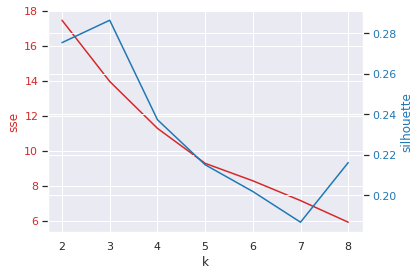

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(2,9)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

##Execute k-means

In [ ]:
#@title Number of clusters {run: "auto"}
k = 4 #@param { type: "slider", min: 2, max: 9, step: 1}

In [ ]:
km = KMeans(n_clusters = k, init = init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)
labels = km.fit_predict(X_pcaa)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pcaa, labels))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.237
Distortion: 11.28


##Visualzation

In [ ]:
import plotly.express as px
#pos = df_feature_selection.index.get_loc('Germany')

fig = px.scatter(x=X_pcaa[:,0], y= X_pcaa[:,1], color = km.labels_)

for i in range(0,len(X_pcaa)):
     fig.add_annotation(x = X_pcaa[i,0], y = X_pcaa[i,1], text = df_feature_selection.iloc[i,:].name)
fig.show()

#Analysis and interpretation of the results

We add the column kmeans_group to the dataframe to better distinguish between groups in the dataframe

In [ ]:
df_feature_selection['kmeans_group'] = km.labels_
km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([3, 1, 3, 3, 2, 1, 3, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       3, 2, 1, 2, 1, 3, 2, 3, 2, 2], dtype=int32)

In [ ]:
df_feature_selection[df_feature_selection['kmeans_group'] == 1]

,goals_scored_open_play_average,goals_scored_average,goals_scored_corner_average,shots_per_goal_average,shots_on_target_per_goal_average,shots_inside_penalty_area_per_goal_average,shots_outside_penalty_area_per_goal_average,shots_scored_inside_penalty_area_percentage,shots_on_target_average,shots_average,...,shots_conceded_average,dribbles_average,dribbles_completed_average,corners_average,crosses_average,crosses_completed_average,shots_on_target_conceded_average,goals-xG_total,dbscan_group,kmeans_group
team_name,,,,,,,,,,,,,,,,,,,,,
Australia,0.00,0.67,0.00,17.5,4.0,11.5,0,1.0,2.7,11.7,...,4.67,18.00,11.00,4.67,12.33,2.00,4.67,-1.50,0,1
Costa Rica,0.33,0.67,0.33,14.0,4.5,7.5,0,1.0,3.0,9.3,...,5.33,16.33,9.00,3.67,10.67,3.00,5.00,-0.09,0,1
Denmark,0.50,0.75,0.00,13.3,4.0,6.7,0,1.0,3.0,10.0,...,4.75,13.50,8.25,4.50,8.75,1.75,5.00,0.20,0,1
Egypt,0.33,0.67,0.00,14.5,2.5,15.0,14,0.5,1.7,9.7,...,5.67,11.33,5.67,2.00,12.00,2.00,5.00,-0.63,2,1
Iceland,0.33,0.67,0.00,18.5,6.5,13.5,0,1.0,4.3,12.3,...,4.33,15.33,8.00,6.00,9.67,1.33,4.33,-2.22,0,1
Iran,0.33,0.67,0.00,11.5,2.0,6.5,0,1.0,1.3,7.7,...,4.00,11.00,8.33,1.67,7.00,1.33,3.67,-0.27,0,1
Mexico,0.50,0.75,0.00,20.3,4.3,10.0,0,1.0,3.3,15.3,...,7.75,23.00,14.00,5.00,10.75,2.00,7.50,-3.44,0,1
Morocco,0.33,0.67,0.33,17.0,5.0,11.5,0,1.0,2.3,11.3,...,3.33,21.00,12.00,4.33,12.00,3.00,3.00,-0.36,0,1
Nigeria,0.67,1.00,0.00,13.0,3.0,7.3,0,1.0,3.0,13.0,...,3.33,21.33,15.33,4.67,9.67,2.00,3.00,-0.06,0,1


We add to the list of characteristics the column *kmeans_group*

In [ ]:
outliers.append('kmeans_group')

We eliminate group 0 because it is an outlier (Germany)

In [ ]:
#cluster0 = df_feature_selection[df_feature_selection['kmeans_group'] == 0]
cluster1 = df_feature_selection[df_feature_selection['kmeans_group'] == 1]
cluster2 = df_feature_selection[df_feature_selection['kmeans_group'] == 2]
cluster3 = df_feature_selection[df_feature_selection['kmeans_group'] == 3]

With every cluster we print a Bar Chart with the means of the different features in order to see the proportion of the different features in every group. (As we will see later, all the features have the same proportion in every group and the real difference is in the total values of them)

In [ ]:
#res0 = cluster0[outliers].groupby(('kmeans_group')).mean()
res1 = cluster1[outliers].groupby(('kmeans_group')).mean()
res2 = cluster2[outliers].groupby(('kmeans_group')).mean()
res3 = cluster3[outliers].groupby(('kmeans_group')).mean()
resX = df_feature_selection[outliers].groupby(('kmeans_group')).mean().drop(0)

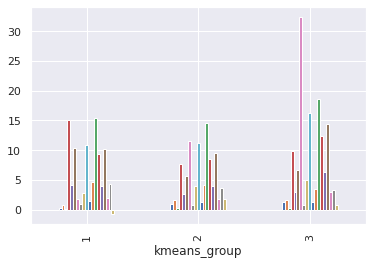

In [ ]:
resX.plot(kind='bar', legend=False)

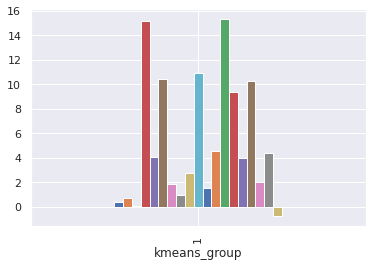

In [ ]:
res1.plot(kind='bar', legend=False)

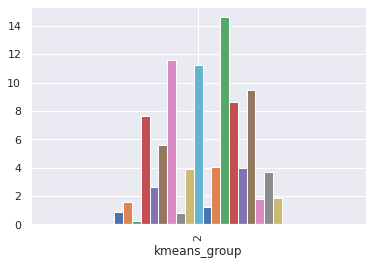

In [ ]:
res2.plot(kind='bar', legend=False)

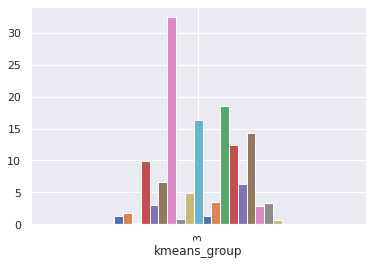

In [ ]:
res3.plot(kind='bar', legend=False)

Observing the values of each feature in each group, we are going to group the features into high, medium and low.

In [ ]:
res_high = ['shots_average', 'dribbles_average', 'shots_outside_penalty_area_per_goal_average', 'kmeans_group']
res_medium = ['shots_per_goal_average','shots_inside_penalty_area_per_goal_average', 'shots_on_target_average', 'shots_conceded_average', 'dribbles_completed_average', 'corners_average', 'crosses_average', 'kmeans_group']
res_low = ['goals-xG_total', 'goals_scored_open_play_average', 'shots_scored_inside_penalty_area_percentage', 'goals_conceded_average', 'goals_scored_average', 'goals_scored_corner_average', 'crosses_completed_average', 'shots_on_target_per_goal_average', 'kmeans_group']

res_high_plot = df_feature_selection[res_high].groupby(('kmeans_group')).mean().drop(0)
res_medium_plot = df_feature_selection[res_medium].groupby(('kmeans_group')).mean().drop(0)
res_low_plot = df_feature_selection[res_low].groupby(('kmeans_group')).mean().drop(0)

In [ ]:
import plotly.graph_objects as go
def print_radar (ress):
  categories = ress.columns.values
  fig = go.Figure()
  for row in ress.iterrows():
    fig.add_trace(go.Scatterpolar(
      r=row[1].values,
      theta=categories,
      fill='toself',
      name= "group" + str(row[0])
    ))

  fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
  )

  fig.show()

In [ ]:
print_radar(res_high_plot)

In [ ]:
print_radar(res_medium_plot)

In [ ]:
print_radar(res_low_plot)

##Conclusions

Paying attention to the previously plotted graphics, we can say that the *shots_average* and the *shots_outside_penalty_area_per_goal_average* in conjunction with the *shots_per_goal_average* and the *shots_inside_penalty_area_per_goal_average* and *goals-xG_total* are the properties that makes the difference between clusters as the rest of the properties are so similiar in all the groups.

Furthermore we want to add that the porpotion of the different features is mostly the same in all the groups and what really differentiates one cluster from another is the absolute value of the previously mentioned features.

Conclusions:

In the world of football not everything is shooting. You have to dribble, pass and make good plays to score a goal. That is why the one that averages the most goals is group 3. This group averages the most dribbles and crosses completed and is also the one that makes the most shots.

Apart from all these factors, success is added. All that is useless if you fail. The perfect example is group 2, which does not stand out in all of the above but since it is the one that hits the most (goals-xG_total), it is almost the one that scores the most goals.

**The conclusion is confirmed by the World Cup itself**:

The teams from group 1 were eliminated first (Panama, Poland).
Group 3 teams went further (Brazil, Argentina).
The World Cup finalists were Croatia and France.
These types of finals are decided by the team that has the most success.
Croatia belongs to group 3 and France to group 2.
France had more success than Croatia and won the World Cup.